In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.base import BaseEstimator
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc

In [55]:
class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X, method = 'normal', threshold = 0.5):
        if method == 'normal':
            return (np.random.normal(size = X.shape[0]) > threshold)
        elif method == 'Bernoulli':
            return (np.random.binomial(1, threshold, size = X.shape[0]))
        else:
            return (np.random.uniform(size = X.shape[0]) > threshold)

In [56]:
model = DummyClassifier()
X = np.random.normal(size = 1000)
p_arr = np.arange(0, 1.1, 0.1)

In [57]:
normal_arr = []
bernoulli_arr = []
uniform_arr = []

for p in p_arr:
    normal_pred = model.predict(X, method = 'normal', threshold = p)
    bernoulli_pred = model.predict(X, method = 'Bernoulli', threshold = p)
    uniform_pred = model.predict(X, method = 'uniform', threshold = p)

    normal_arr.append(np.mean(normal_pred))
    bernoulli_arr.append(np.mean(bernoulli_pred))
    uniform_arr.append(np.mean(uniform_pred))

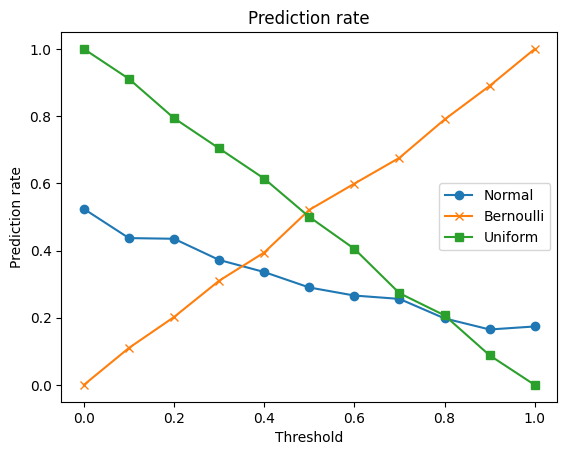

In [58]:
plt.plot(p_arr, normal_arr, label='Normal', marker='o')
plt.plot(p_arr, bernoulli_arr, label='Bernoulli', marker='x')
plt.plot(p_arr, uniform_arr, label='Uniform', marker='s')
plt.title('Prediction rate')
plt.xlabel('Threshold')
plt.ylabel('Prediction rate')
plt.legend()
plt.show()

In [59]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df = df[df['target'] != 2]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
tp_list = []
fp_list = []
tn_list = []
fn_list = []

for p in p_arr:
    # Generate predictions for each method
    normal_pred = model.predict(df.drop('target', axis=1), method='normal', threshold=p)
    bernoulli_pred = model.predict(df.drop('target', axis=1), method='Bernoulli', threshold=p)
    uniform_pred = model.predict(df.drop('target', axis=1), method='uniform', threshold=p)
    
    # Calculate confusion matrix for each method
    cm_normal = confusion_matrix(df['target'], normal_pred)
    cm_bernoulli = confusion_matrix(df['target'], bernoulli_pred)
    cm_uniform = confusion_matrix(df['target'], uniform_pred)
    
    # Extract TP, FP, TN, FN for each method
    tn_normal, fp_normal, fn_normal, tp_normal = cm_normal.ravel()
    tn_bernoulli, fp_bernoulli, fn_bernoulli, tp_bernoulli = cm_bernoulli.ravel()
    tn_uniform, fp_uniform, fn_uniform, tp_uniform = cm_uniform.ravel()
    
    # Store the metrics
    tp_list.append((tp_normal, tp_bernoulli, tp_uniform))
    fp_list.append((fp_normal, fp_bernoulli, fp_uniform))
    tn_list.append((tn_normal, tn_bernoulli, tn_uniform))
    fn_list.append((fn_normal, fn_bernoulli, fn_uniform))

tp_arr = np.array(tp_list)
fp_arr = np.array(fp_list)
tn_arr = np.array(tn_list)
fn_arr = np.array(fn_list)

In [61]:
precision_normal = tp_arr[:, 0] / (tp_arr[:, 0] + fp_arr[:, 0])
precision_bernoulli = tp_arr[:, 1] / (tp_arr[:, 1] + fp_arr[:, 1])
precision_uniform = tp_arr[:, 2] / (tp_arr[:, 2] + fp_arr[:, 2])

recall_normal = tp_arr[:, 0] / (tp_arr[:, 0] + fn_arr[:, 0])
recall_bernoulli = tp_arr[:, 1] / (tp_arr[:, 1] + fn_arr[:, 1])
recall_uniform = tp_arr[:, 2] / (tp_arr[:, 2] + fn_arr[:, 2])

f1_normal = 2 * (precision_normal * recall_normal) / (precision_normal + recall_normal)
f1_bernoulli = 2 * (precision_bernoulli * recall_bernoulli) / (precision_bernoulli + recall_bernoulli)
f1_uniform = 2 * (precision_uniform * recall_uniform) / (precision_uniform + recall_uniform)

C:\Users\anike\AppData\Local\Temp\ipykernel_22564\1865354633.py:2: RuntimeWarning: invalid value encountered in divide
  precision_bernoulli = tp_arr[:, 1] / (tp_arr[:, 1] + fp_arr[:, 1])
C:\Users\anike\AppData\Local\Temp\ipykernel_22564\1865354633.py:3: RuntimeWarning: invalid value encountered in divide
  precision_uniform = tp_arr[:, 2] / (tp_arr[:, 2] + fp_arr[:, 2])


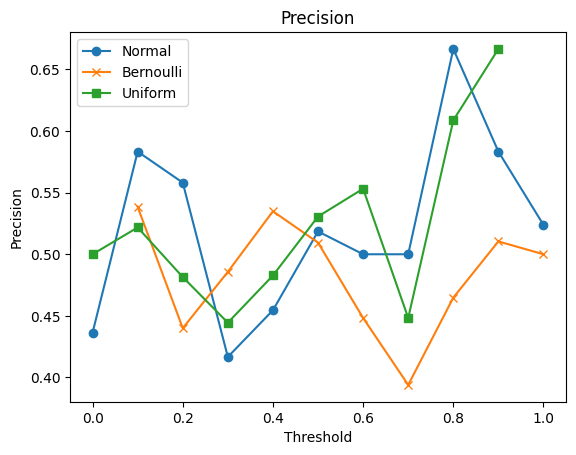

In [62]:
plt.plot(p_arr, precision_normal, label='Normal', marker='o')
plt.plot(p_arr, precision_bernoulli, label='Bernoulli', marker='x')
plt.plot(p_arr, precision_uniform, label='Uniform', marker='s')
plt.title('Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.legend()
plt.show()

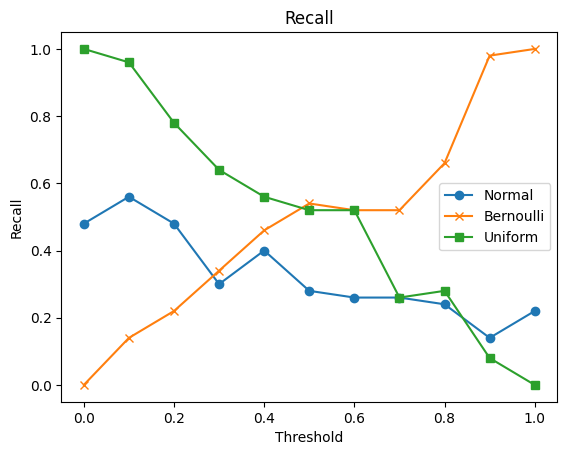

In [63]:
plt.plot(p_arr, recall_normal, label='Normal', marker='o')
plt.plot(p_arr, recall_bernoulli, label='Bernoulli', marker='x')
plt.plot(p_arr, recall_uniform, label='Uniform', marker='s')
plt.title('Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.legend()
plt.show()

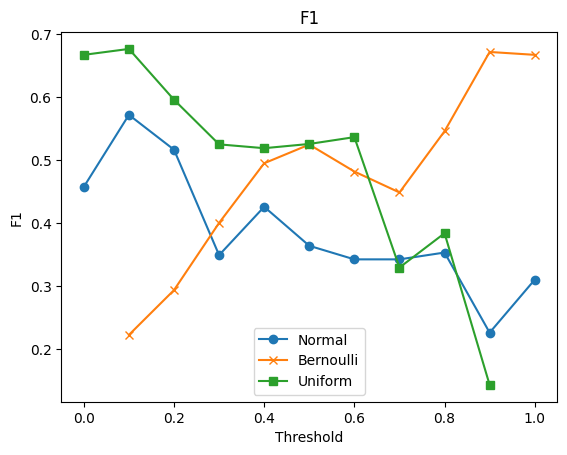

In [64]:
plt.plot(p_arr, f1_normal, label='Normal', marker='o')
plt.plot(p_arr, f1_bernoulli, label='Bernoulli', marker='x')
plt.plot(p_arr, f1_uniform, label='Uniform', marker='s')
plt.title('F1')
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.legend()
plt.show()

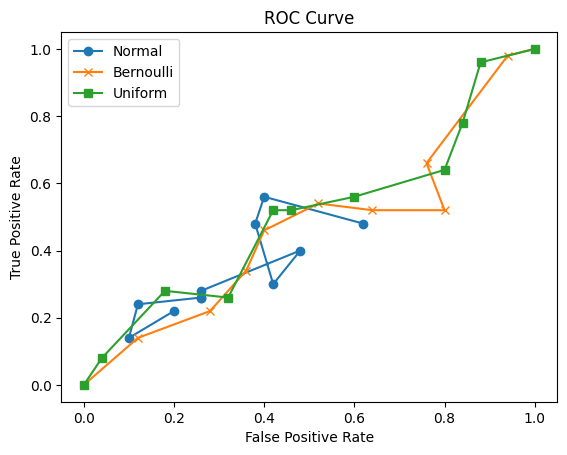

In [67]:
tpr_normal = tp_arr[:, 0] / (tp_arr[:, 0] + fn_arr[:, 0])
fpr_normal = fp_arr[:, 0] / (fp_arr[:, 0] + tn_arr[:, 0])

tpr_bernoulli = tp_arr[:, 1] / (tp_arr[:, 1] + fn_arr[:, 1])
fpr_bernoulli = fp_arr[:, 1] / (fp_arr[:, 1] + tn_arr[:, 1])

tpr_uniform = tp_arr[:, 2] / (tp_arr[:, 2] + fn_arr[:, 2])
fpr_uniform = fp_arr[:, 2] / (fp_arr[:, 2] + tn_arr[:, 2])

# Plot ROC curve for each method
plt.figure()
plt.plot(fpr_normal, tpr_normal, marker='o', label='Normal')
plt.plot(fpr_bernoulli, tpr_bernoulli, marker='x', label='Bernoulli')
plt.plot(fpr_uniform, tpr_uniform, marker='s', label='Uniform')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()